In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs
import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.cm as mpl_cm
import numpy as np

from minisom import MiniSom

In [2]:
fogData = xr.open_dataset('../../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
yAll=fg.fogdata.sum(dim='stations').sel(time=slice('1980-12-1','2018-1-31'))
yAll=yAll/25.0
yWd= yAll[yAll >0.44]
yWd

<xarray.DataArray 'fogdata' (time: 588)>
array([0.48, 0.52, 0.6 , 0.64, 0.6 , 0.6 , 0.48, 0.48, 0.48, 0.52, 0.48,
       0.48, 0.48, 0.6 , 0.48, 0.56, 0.48, 0.52, 0.48, 0.52, 0.48, 0.52,
       0.52, 0.56, 0.56, 0.64, 0.48, 0.48, 0.48, 0.6 , 0.52, 0.6 , 0.56,
       0.48, 0.6 , 0.6 , 0.56, 0.52, 0.48, 0.52, 0.48, 0.52, 0.48, 0.48,
       0.48, 0.52, 0.48, 0.52, 0.48, 0.48, 0.52, 0.56, 0.48, 0.6 , 0.6 ,
       0.6 , 0.48, 0.56, 0.48, 0.52, 0.56, 0.48, 0.56, 0.48, 0.48, 0.6 ,
       0.6 , 0.56, 0.6 , 0.48, 0.56, 0.56, 0.52, 0.48, 0.56, 0.52, 0.48,
       0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.52, 0.52, 0.48, 0.48,
       0.48, 0.6 , 0.72, 0.48, 0.68, 0.48, 0.56, 0.56, 0.52, 0.64, 0.68,
       0.52, 0.72, 0.64, 0.48, 0.72, 0.48, 0.48, 0.48, 0.48, 0.56, 0.48,
       0.48, 0.56, 0.56, 0.6 , 0.52, 0.48, 0.48, 0.48, 0.6 , 0.64, 0.56,
       0.6 , 0.64, 0.64, 0.52, 0.6 , 0.6 , 0.68, 0.52, 0.6 , 0.68, 0.56,
       0.52, 0.72, 0.6 , 0.64, 0.56, 0.52, 0.52, 0.48, 0.6 , 0.6 , 0.56,
       0.52, 0.52, 0.6 , 0.76, 0.84, 0.8 , 0.64, 0.8 , 0.64, 0.72, 0.76,
       0.76, 0.52, 0.52, 0.48, 0.48, 0.6 , 0.48, 0.48, 0.56, 0.52, 0.64,
       0.56, 0.56, 0.72, 0.88, 0.76, 0.52, 0.72, 0.72, 0.64, 0.52, 0.52,
       0.56, 0.56, 0.76, 0.68, 0.52, 0.56, 0.72, 0.72, 0.72, 0.68, 0.72,
       0.56, 0.52, 0.48, 0.52, 0.52, 0.56, 0.6 , 0.68, 0.68, 0.64, 0.68,
       0.92, 0.84, 0.64, 0.56, 0.52, 0.52, 0.48, 0.56, 0.52, 0.68, 0.64,
       0.52, 0.48, 0.64, 0.48, 0.84, 0.84, 0.6 , 0.52, 0.48, 0.64, 0.72,
...
       0.72, 0.56, 0.72, 0.68, 0.76, 0.6 , 0.68, 0.72, 0.72, 0.68, 0.72,
       0.76, 0.84, 0.84, 0.8 , 0.8 , 0.84, 0.68, 0.48, 0.52, 0.64, 0.68,
       0.64, 0.48, 0.48, 0.48, 0.48, 0.48, 0.6 , 0.72, 0.72, 0.68, 0.48,
       0.64, 0.76, 0.8 , 0.68, 0.6 , 0.56, 0.52, 0.56, 0.6 , 0.68, 0.52,
       0.56, 0.64, 0.64, 0.48, 0.48, 0.56, 0.68, 0.52, 0.6 , 0.48, 0.48,
       0.52, 0.48, 0.68, 0.64, 0.64, 0.56, 0.56, 0.56, 0.48, 0.64, 0.6 ,
       0.52, 0.56, 0.52, 0.52, 0.6 , 0.52, 0.48, 0.76, 0.6 , 0.68, 0.64,
       0.48, 0.48, 0.64, 0.48, 0.6 , 0.72, 0.68, 0.56, 0.48, 0.56, 0.56,
       0.52, 0.56, 0.56, 0.64, 0.72, 0.6 , 0.8 , 0.8 , 0.76, 0.72, 0.6 ,
       0.68, 0.8 , 0.76, 0.72, 0.76, 0.48, 0.64, 0.68, 0.56, 0.48, 0.56,
       0.52, 0.56, 0.52, 0.52, 0.64, 0.72, 0.48, 0.6 , 0.52, 0.52, 0.52,
       0.6 , 0.64, 0.6 , 0.48, 0.48, 0.56, 0.56, 0.48, 0.48, 0.52, 0.52,
       0.48, 0.56, 0.76, 0.6 , 0.48, 0.52, 0.48, 0.48, 0.6 , 0.6 , 0.72,
       0.48, 0.56, 0.72, 0.76, 0.8 , 0.64, 0.64, 0.72, 0.76, 0.76, 0.76,
       0.52, 0.52, 0.68, 0.6 , 0.68, 0.68, 0.68, 0.52, 0.56, 0.64, 0.64,
       0.68, 0.64, 0.64, 0.64, 0.64, 0.8 , 0.8 , 0.72, 0.48, 0.48, 0.56,
       0.64, 0.56, 0.72, 0.72, 0.52, 0.56, 0.6 , 0.48, 0.52, 0.48, 0.64,
       0.6 , 0.56, 0.68, 0.68, 0.68, 0.76, 0.76, 0.6 , 0.68, 0.8 , 0.68,
       0.52, 0.68, 0.64, 0.48, 0.48, 0.52, 0.52, 0.68, 0.68, 0.56, 0.48,
       0.56, 0.64, 0.6 , 0.64, 0.64])
Coordinates:
  * time     (time) datetime64[ns] 1983-01-04 1983-01-05 ... 2018-01-29

In [3]:
z500Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_500_z_daily_NovDecJan.nc')
z500Data
z=z500Data.z.shift(time=1)
z.values=z.values/9.81
#z

In [37]:
da = z.assign_coords(month_day=z.time.dt.strftime("%m-%d"))
dailyAnomZ = da.groupby("month_day") - da.groupby("month_day").mean("time")
decJanAnomz=dailyAnomZ[(dailyAnomZ.time.dt.month>11) | (dailyAnomZ.time.dt.month<2)].sel(time=slice('1980-12-1','2018-1-31'),latitude=slice(70,0),longitude=slice(30,120))
yAll['time'] = decJanAnomz.time
wfdZAnom=decJanAnomz[yAll >0.44,:,:]
wfdZAnom

<xarray.DataArray 'z' (time: 588, latitude: 36, longitude: 46)>
array([[[ 3.78964844e+01,  5.59047852e+01,  7.28525391e+01, ...,
         -9.57773438e+01, -1.02249023e+02, -1.07085449e+02],
        [ 4.94755859e+01,  6.58569336e+01,  8.22250977e+01, ...,
         -1.53792969e+02, -1.58804688e+02, -1.61038086e+02],
        [ 5.26899414e+01,  6.62968750e+01,  8.14438477e+01, ...,
         -1.95109375e+02, -2.02114746e+02, -2.03596191e+02],
        ...,
        [ 5.72509766e+00,  6.79541016e+00,  7.29980469e+00, ...,
          2.72412109e+00,  2.38378906e+00,  1.93798828e+00],
        [ 8.27783203e+00,  8.73291016e+00,  7.84716797e+00, ...,
          1.76367188e+00,  1.60400391e+00,  1.87597656e+00],
        [ 7.05029297e+00,  7.27441406e+00,  7.75537109e+00, ...,
          1.15185547e+00,  9.79003906e-01,  1.71240234e+00]],

       [[ 2.53637695e+01,  3.53139648e+01,  4.35688477e+01, ...,
         -1.34467773e+01, -2.91669922e+01, -4.17338867e+01],
        [ 2.73232422e+01,  3.37119141e+01,  3.73588867e+01, ...,
         -6.70117188e+01, -8.18100586e+01, -8.89824219e+01],
        [ 3.22797852e+01,  3.71723633e+01,  4.06469727e+01, ...,
         -1.16485840e+02, -1.23368652e+02, -1.19005859e+02],
...
         -1.08027344e+01, -1.27788086e+01, -1.25429688e+01],
        [-5.77294922e+00, -5.56689453e+00, -5.16650391e+00, ...,
         -1.25375977e+01, -1.51201172e+01, -1.58076172e+01],
        [-6.87255859e+00, -6.20263672e+00, -5.65820312e+00, ...,
         -1.18540039e+01, -1.37441406e+01, -1.63613281e+01]],

       [[ 1.04713867e+02,  1.00210938e+02,  9.46679688e+01, ...,
          3.32680664e+01,  3.70766602e+01,  3.81147461e+01],
        [ 9.91450195e+01,  9.55063477e+01,  9.15458984e+01, ...,
          3.83071289e+01,  3.91064453e+01,  3.58100586e+01],
        [ 9.31220703e+01,  9.32265625e+01,  9.23642578e+01, ...,
          3.91879883e+01,  3.49658203e+01,  2.61201172e+01],
        ...,
        [ 3.04541016e+00,  3.05761719e+00,  3.61328125e-01, ...,
         -1.15571289e+01, -1.32373047e+01, -1.41997070e+01],
        [ 1.86962891e+00,  1.06298828e+00, -1.52636719e+00, ...,
         -1.23105469e+01, -1.53500977e+01, -1.59570312e+01],
        [ 1.90429688e-01, -6.24023438e-01, -1.35449219e+00, ...,
         -1.26508789e+01, -1.40712891e+01, -1.59692383e+01]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1983-01-04T09:00:00 ... 2018-01-29T09:00:00
  * longitude  (longitude) float32 30.0 32.0 34.0 36.0 ... 116.0 118.0 120.0
  * latitude   (latitude) float32 70.0 68.0 66.0 64.0 62.0 ... 6.0 4.0 2.0 0.0
    month_day  (time) object '01-04' '01-05' '01-06' ... '01-27' '01-28' '01-29'

In [86]:
decJanz=z[(z.time.dt.month>11) | (z.time.dt.month<2)].sel(time=slice('1980-12-1','2018-1-31'),latitude=slice(33,24),longitude=slice(72,87))
yAll['time'] = decJanz.time
# get WFD daily anomaly
wfdZ=decJanz[yAll >0.44,:,:]

In [87]:
wfdZ

<xarray.DataArray 'z' (time: 588, latitude: 5, longitude: 8)>
array([[[5735.6646, 5723.297 , 5707.029 , ..., 5671.767 , 5665.1177,
         5658.978 ],
        [5770.8823, 5755.8555, 5735.0884, ..., 5680.854 , 5677.5293,
         5671.501 ],
        [5802.3105, 5787.5054, 5768.6885, ..., 5699.0723, 5678.704 ,
         5668.0654],
        [5830.658 , 5816.03  , 5797.9883, ..., 5732.5396, 5706.32  ,
         5682.6714],
        [5853.9297, 5840.831 , 5825.4053, ..., 5767.181 , 5741.826 ,
         5715.7393]],

       [[5729.1484, 5721.9453, 5712.57  , ..., 5676.7314, 5669.772 ,
         5664.0757],
        [5767.0483, 5756.875 , 5742.6685, ..., 5690.6055, 5684.9316,
         5675.202 ],
        [5799.407 , 5789.3003, 5776.1353, ..., 5718.0664, 5692.6006,
         5686.705 ],
        [5827.887 , 5818.534 , 5805.9673, ..., 5754.969 , 5730.456 ,
         5706.874 ],
        [5851.4917, 5842.3384, 5830.9683, ..., 5788.3477, 5768.112 ,
...
         5579.056 ],
        [5696.7896, 5685.309 , 5672.587 , ..., 5637.546 , 5629.057 ,
         5613.166 ],
        [5746.126 , 5735.177 , 5722.056 , ..., 5678.5264, 5659.3994,
         5643.8403],
        [5786.2417, 5778.2188, 5768.1343, ..., 5730.855 , 5715.141 ,
         5700.0474],
        [5816.9385, 5811.3755, 5804.372 , ..., 5776.6226, 5766.2725,
         5752.952 ]],

       [[5670.947 , 5671.456 , 5669.7275, ..., 5648.4727, 5637.3687,
         5631.1406],
        [5713.7   , 5712.57  , 5708.2036, ..., 5690.118 , 5685.1313,
         5667.356 ],
        [5756.454 , 5756.077 , 5754.1265, ..., 5736.9277, 5721.7456,
         5707.7163],
        [5793.0464, 5793.667 , 5792.1377, ..., 5780.324 , 5773.3647,
         5762.4604],
        [5823.543 , 5824.009 , 5823.2554, ..., 5815.431 , 5810.3784,
         5803.7734]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1983-01-04T09:00:00 ... 2018-01-29T09:00:00
  * longitude  (longitude) float32 72.0 74.0 76.0 78.0 80.0 82.0 84.0 86.0
  * latitude   (latitude) float32 32.0 30.0 28.0 26.0 24.0
    month_day  (time) object '01-04' '01-05' '01-06' ... '01-27' '01-28' '01-29'
Attributes:
    standard_name:  geopotential
    long_name:      Geopotential
    units:          m**2 s**-2

In [88]:
#decJanz

In [89]:
data=wfdZ.stack(z=( "latitude","longitude"))

# Data normalization
data=(data - np.mean(data, axis=0)) / np.std(data, axis=0)

#tolist()
#len(data[0])

data = data.values
data

array([[ 0.6146765 ,  0.4008482 ,  0.09126414, ..., -0.8011924 ,
        -1.3487742 , -1.9417403 ],
       [ 0.50670296,  0.37806207,  0.18811867, ..., -0.2962949 ,
        -0.71373427, -1.2107255 ],
       [ 0.24778491,  0.15012668,  0.00914092, ..., -0.10227468,
        -0.45724338, -0.91767156],
       ...,
       [-0.830842  , -1.1083542 , -1.448687  , ..., -1.3039701 ,
        -1.4580096 , -1.6051003 ],
       [-0.78567845, -0.9334822 , -1.1438018 , ..., -0.5759808 ,
        -0.7581716 , -1.0271528 ],
       [-0.45771235, -0.4731415 , -0.5607457 , ...,  0.3497442 ,
         0.3073927 ,  0.22189054]], dtype=float32)

In [90]:
n_row=2
m_col=3
som = MiniSom(n_row, m_col, len(data[0]),neighborhood_function='gaussian', random_seed=50)
som.pca_weights_init(data)
som.train(data, 100000, verbose=False)  # random training

In [91]:
label=[]
for x in data :
    intlabel=som.winner(x)
    label.append(str(intlabel[0])+"_"+str(intlabel[1]))

#label    

In [92]:
wfdZS=wfdZAnom.assign_coords(somlabel=('time',label))
wfdZS.somlabel

<xarray.DataArray 'somlabel' (time: 588)>
array(['0_0', '0_0', '0_0', '0_1', '0_0', '0_0', '1_1', '0_1', '1_0',
       '1_2', '1_1', '1_1', '0_1', '1_1', '1_1', '0_2', '0_2', '0_2',
       '0_2', '0_2', '0_2', '0_2', '0_2', '1_1', '1_0', '1_1', '0_0',
       '1_1', '1_0', '1_0', '0_0', '1_0', '1_0', '1_0', '1_0', '1_0',
       '1_1', '1_1', '1_2', '1_0', '1_0', '1_0', '0_1', '1_1', '0_0',
       '0_2', '1_2', '0_1', '1_0', '1_0', '1_0', '1_0', '1_0', '1_2',
       '0_1', '1_2', '0_2', '1_0', '1_0', '1_0', '1_0', '0_1', '0_1',
       '1_1', '1_1', '1_0', '1_0', '1_0', '1_1', '0_0', '0_0', '0_0',
       '0_1', '1_1', '1_0', '1_0', '1_0', '1_0', '0_2', '1_2', '0_1',
       '1_1', '1_0', '1_0', '1_0', '1_1', '1_1', '1_0', '1_0', '1_0',
       '1_0', '0_0', '0_1', '1_1', '1_0', '0_0', '1_1', '0_1', '0_1',
       '0_1', '1_1', '0_0', '1_1', '1_1', '1_0', '0_0', '1_0', '1_2',
       '1_2', '0_1', '1_1', '0_2', '0_2', '0_2', '0_2', '1_2', '0_1',
       '0_1', '0_1', '0_2', '0_2', '0_2', '0_2', '1_2', '0_0', '0_1',
       '1_2', '0_2', '1_2', '1_1', '1_0', '0_0', '0_0', '0_1', '1_1',
       '1_1', '1_1', '1_1', '0_2', '1_2', '1_2', '0_1', '0_1', '0_2',
       '0_1', '0_0', '0_0', '0_1', '0_1', '1_1', '1_1', '1_0', '0_0',
       '0_1', '0_0', '1_0', '0_0', '0_0', '0_1', '0_1', '0_1', '0_1',
       '1_0', '1_0', '1_0', '1_0', '1_0', '0_0', '1_0', '1_0', '0_0',
       '0_0', '1_1', '1_1', '0_1', '0_1', '0_1', '0_1', '0_1', '1_2',
...
       '0_1', '0_0', '1_0', '1_0', '1_0', '0_0', '0_0', '0_1', '0_0',
       '1_0', '1_0', '1_0', '1_0', '0_1', '1_1', '0_0', '0_1', '0_2',
       '1_2', '0_0', '0_0', '0_0', '1_1', '0_1', '1_0', '1_0', '0_0',
       '1_1', '1_0', '0_0', '1_2', '1_2', '1_1', '1_1', '1_1', '0_1',
       '1_2', '1_2', '1_1', '1_1', '0_1', '0_1', '0_1', '1_1', '1_1',
       '0_2', '1_2', '0_1', '1_0', '0_0', '0_1', '0_2', '0_2', '1_2',
       '0_1', '0_1', '1_1', '1_2', '1_2', '0_1', '0_1', '1_2', '1_1',
       '1_0', '0_1', '0_0', '0_0', '0_0', '0_2', '0_2', '0_1', '1_0',
       '1_0', '0_0', '1_1', '0_1', '1_0', '1_1', '1_0', '1_0', '0_2',
       '0_2', '0_2', '0_2', '0_0', '0_1', '1_2', '0_2', '1_1', '1_1',
       '1_0', '1_0', '1_0', '1_0', '0_0', '0_0', '0_0', '0_0', '0_0',
       '0_1', '0_2', '0_2', '0_2', '0_2', '0_2', '0_2', '0_2', '0_2',
       '0_2', '0_2', '1_2', '1_2', '1_2', '1_2', '1_2', '0_2', '0_2',
       '0_2', '0_2', '0_2', '0_1', '0_0', '1_2', '0_2', '0_2', '0_2',
       '1_2', '0_0', '0_0', '0_0', '0_0', '0_0', '0_0', '1_0', '1_0',
       '1_0', '1_0', '1_1', '1_2', '0_1', '0_2', '0_2', '0_2', '1_2',
       '1_1', '0_1', '0_2', '0_2', '1_2', '0_1', '1_1', '1_0', '1_0',
       '1_0', '0_0', '1_0', '1_0', '1_0', '0_0', '0_1', '1_2', '0_2',
       '0_2', '1_2', '0_1', '1_2', '0_1', '1_2', '1_2', '1_0', '1_0',
       '1_0', '0_0', '1_1'], dtype='<U3')
Coordinates:
  * time       (time) datetime64[ns] 1983-01-04T09:00:00 ... 2018-01-29T09:00:00
    month_day  (time) object '01-04' '01-05' '01-06' ... '01-27' '01-28' '01-29'
    somlabel   (time) <U3 '0_0' '0_0' '0_0' '0_1' ... '1_0' '1_0' '0_0' '1_1'

In [93]:
soms=wfdZS.groupby('somlabel').mean()
som1=soms.sel(somlabel='0_0')
som2=soms.sel(somlabel='0_1')
som3=soms.sel(somlabel='0_2')
som4=soms.sel(somlabel='1_0')
som5=soms.sel(somlabel='1_1')
som6=soms.sel(somlabel='1_2')

In [94]:
soms_n=wfdZS.groupby('somlabel').count()
soms_n[:,0,0]

<xarray.DataArray 'z' (somlabel: 6)>
array([ 93, 126,  86, 118,  88,  77])
Coordinates:
    longitude  float32 30.0
    latitude   float32 70.0
  * somlabel   (somlabel) object '0_0' '0_1' '0_2' '1_0' '1_1' '1_2'

In [95]:
som1_cube=som1.to_iris()
som2_cube=som2.to_iris()
som3_cube=som3.to_iris()
som4_cube=som4.to_iris()
som5_cube=som5.to_iris()
som6_cube=som6.to_iris()




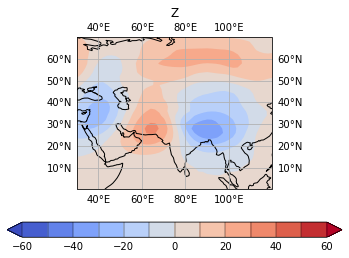

In [96]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som1_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

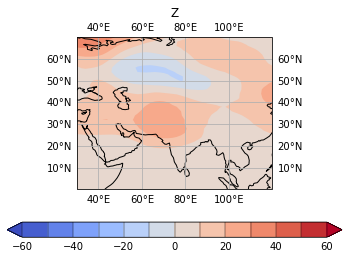

In [97]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som2_cube, cmap='coolwarm',extend='both',levels=levels)
#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

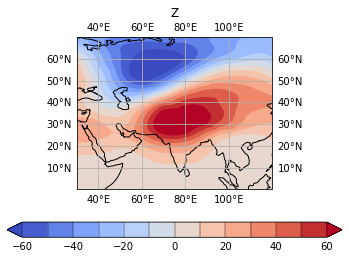

In [98]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som3_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

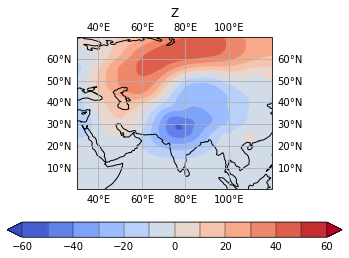

In [99]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som4_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

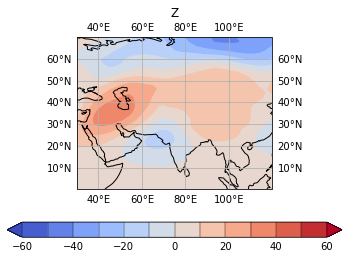

In [100]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som5_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()

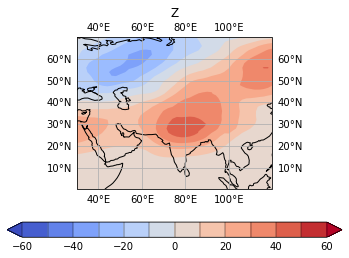

In [101]:
levels = (-60,-50,-40,-30,-20, -10,0,10,20,30,40,50,60)

qplt.contourf(som6_cube, cmap='coolwarm',extend='both',levels=levels)

#qplt.contourf(wfdZComp_cube, brewer_cmap.N, cmap=brewer_cmap,levels=levels)

# Add coastlines to the map created by contourf.
plt.gca().coastlines()
plt.gca().gridlines(draw_labels=True)

plt.show()